In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, ResNet152V2, ResNet50V2, xception
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pandas as pd
import glob
import os
import cv2
import random as rand
import os
import xml.etree.ElementTree as et
import re
import pandas as pd

In [2]:
bases_prontas_path = os.path.join("D:\\","FIA","TCC","BASES","")
print(bases_prontas_path)

D:\FIA\TCC\BASES\


## Criar modelos com transfer learning

In [3]:
baseModel_MobileNetV2 = MobileNetV2(weights="imagenet", include_top=False,
                        input_tensor=Input(shape=(64, 64, 3)))

C:\Users\wesle\anaconda3\envs\py3_6_tensorflow2_1\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [24]:
# construct the head of the model that will be placed on top of the
# the base model
headModel_MobileNetV2 = baseModel_MobileNetV2.output
# headModel_MobileNetV2 = AveragePooling2D(pool_size=(7, 7))(headModel_MobileNetV2)
headModel_MobileNetV2 = AveragePooling2D(pool_size=(2, 2))(headModel_MobileNetV2)
headModel_MobileNetV2 = Flatten(name="flatten")(headModel_MobileNetV2)
headModel_MobileNetV2 = Dense(12288, activation="relu")(headModel_MobileNetV2)
headModel_MobileNetV2 = Dropout(0.3)(headModel_MobileNetV2)
headModel_MobileNetV2 = Dense(4096, activation="relu")(headModel_MobileNetV2)
headModel_MobileNetV2 = Dropout(0.3)(headModel_MobileNetV2)
headModel_MobileNetV2 = Dense(3, activation="softmax")(headModel_MobileNetV2)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model_based_MobileNetV2 = Model(inputs=baseModel_MobileNetV2.input, outputs=headModel_MobileNetV2)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel_MobileNetV2.layers:
    layer.trainable = False

In [25]:
baseModel_MobileNetV2_224 = MobileNetV2(weights="imagenet", include_top=False,
                        input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel_MobileNetV2_224 = baseModel_MobileNetV2_224.output
headModel_MobileNetV2_224 = AveragePooling2D(pool_size=(7, 7))(headModel_MobileNetV2_224)
headModel_MobileNetV2_224 = Flatten(name="flatten")(headModel_MobileNetV2_224)
headModel_MobileNetV2_224 = Dense(12288, activation="relu")(headModel_MobileNetV2_224)
headModel_MobileNetV2_224 = Dropout(0.3)(headModel_MobileNetV2_224)
headModel_MobileNetV2_224 = Dense(4096, activation="relu")(headModel_MobileNetV2_224)
headModel_MobileNetV2_224 = Dropout(0.3)(headModel_MobileNetV2_224)
headModel_MobileNetV2_224 = Dense(3, activation="softmax")(headModel_MobileNetV2_224)


# place the head FC model on top of the base model (this will become
# the actual model we will train)
model_based_MobileNetV2_224 = Model(inputs=baseModel_MobileNetV2_224.input, outputs=headModel_MobileNetV2_224)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel_MobileNetV2_224.layers:
    layer.trainable = False

C:\Users\wesle\anaconda3\envs\py3_6_tensorflow2_1\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [6]:
# baseModel_ResNet152V2 = ResNet152V2(weights="imagenet", include_top=False,
#                         input_tensor=Input(shape=(224, 224, 3)))
baseModel_ResNet152V2 = ResNet152V2(weights="imagenet", include_top=False,
                        input_tensor=Input(shape=(64, 64, 3)))

In [ ]:
# construct the head of the model that will be placed on top of the
# the base model
headModel_ResNet152V2 = baseModel_ResNet152V2.output
# headModel_ResNet152V2 = AveragePooling2D(pool_size=(7, 7))(headModel_ResNet152V2)
headModel_ResNet152V2 = AveragePooling2D(pool_size=(2, 2))(headModel_ResNet152V2)
headModel_ResNet152V2 = Flatten(name="flatten")(headModel_ResNet152V2)
headModel_ResNet152V2 = Dense(64, activation="relu")(headModel_ResNet152V2)
headModel_ResNet152V2 = Dropout(0.5)(headModel_ResNet152V2)
headModel_ResNet152V2 = Dense(3, activation="softmax")(headModel_ResNet152V2)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model_based_ResNet152V2 = Model(inputs=baseModel_ResNet152V2.input, outputs=headModel_ResNet152V2)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel_ResNet152V2.layers:
    layer.trainable = False

In [ ]:
# baseModel_ResNet50V2 = ResNet50V2(weights="imagenet", include_top=False,
#                         input_tensor=Input(shape=(224, 224, 3)))
baseModel_ResNet50V2 = ResNet50V2(weights="imagenet", include_top=False,
                        input_tensor=Input(shape=(64, 64, 3)))

In [ ]:
# construct the head of the model that will be placed on top of the
# the base model
headModel_ResNet50V2 = baseModel_ResNet50V2.output
# headModel_ResNet50V2 = AveragePooling2D(pool_size=(7, 7))(headModel_ResNet50V2)
headModel_ResNet50V2 = AveragePooling2D(pool_size=(2, 2))(headModel_ResNet50V2)
headModel_ResNet50V2 = Flatten(name="flatten")(headModel_ResNet50V2)
headModel_ResNet50V2 = Dense(64, activation="relu")(headModel_ResNet50V2)
headModel_ResNet50V2 = Dropout(0.5)(headModel_ResNet50V2)
headModel_ResNet50V2 = Dense(3, activation="softmax")(headModel_ResNet50V2)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model_based_ResNet50V2 = Model(inputs=baseModel_ResNet50V2.input, outputs=headModel_ResNet50V2)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel_ResNet50V2.layers:
    layer.trainable = False

In [ ]:
# baseModel_xception = xception.Xception(weights="imagenet", include_top=False,
#                         input_tensor=Input(shape=(224, 224, 3)))
baseModel_xception = xception.Xception(weights="imagenet", include_top=False,
                        input_tensor=Input(shape=(64, 64, 3)))

In [ ]:
# construct the head of the model that will be placed on top of the
# the base model
headModel_xception = baseModel_xception.output
# headModel_xception = AveragePooling2D(pool_size=(7, 7))(headModel_xception)
headModel_xception = AveragePooling2D(pool_size=(2, 2))(headModel_xception)
headModel_xception = Flatten(name="flatten")(headModel_xception)
headModel_xception = Dense(64, activation="relu")(headModel_xception)
headModel_xception = Dropout(0.5)(headModel_xception)
headModel_xception = Dense(3, activation="softmax")(headModel_xception)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model_based_xception = Model(inputs=baseModel_xception.input, outputs=headModel_xception)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel_xception.layers:
    layer.trainable = False

In [6]:
INIT_LR = 1e-4
EPOCHS = 100
BS = 1


# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
"""
featurewise_center ==> Boleano. Defina a média de entrada como 0 no conjunto de dados, em termos de recursos.
samplewise_center ==> Boleano. Defina cada média de amostra como 0.
featurewise_std_normalization ==> Boleano. Divida as entradas por padrão do conjunto de dados, em termos de recursos.
samplewise_std_normalization ==> Boleano. Divida cada entrada por seu padrão.
zca_epsilon ==> epsilon para clareamento ZCA. O padrão é 1e-6.
zca_whitening ==> Boleano. Aplique o clareamento ZCA.
rotation_range ==> Int. Faixa de graus para rotações aleatórias.
width_shift_range ==> Flutuante, semelhante a uma matriz 1-D ou int
                    * float: fração da largura total, se <1, ou pixels se> = 1.
                    * 1-D tipo array: elementos aleatórios do array.
                    * int: número inteiro de pixels do intervalo (-width_shift_range, +width_shift_range)
                    * Com width_shift_range=2valores possíveis são inteiros [-1, 0, +1],
                      o mesmo que com width_shift_range=[-1, 0, +1], 
                      enquanto com width_shift_range=1.0
                      valores possíveis são flutuantes no intervalo [-1,0, +1,0).
height_shift_range ==> Flutuante, semelhante a uma matriz 1-D ou int
                    * float: fração da altura total, se <1, ou pixels se> = 1.
                    * 1-D tipo array: elementos aleatórios do array.
                    * int: número inteiro de pixels do intervalo (-height_shift_range, +height_shift_range)
                    * Com height_shift_range=2valores possíveis são inteiros [-1, 0, +1], 
                      o mesmo que com height_shift_range=[-1, 0, +1], 
                      enquanto com height_shift_range=1.0valores possíveis são flutuantes no intervalo [-1,0, +1,0).
brightness_range ==> Tupla ou lista de dois flutuadores. Faixa para escolher um valor de mudança de brilho.

shear_range ==> Flutuador. Intensidade de cisalhamento (ângulo de cisalhamento no sentido anti-horário em graus)
zoom_range ==> Flutuar ou [inferior, superior]. Intervalo para zoom aleatório. Se um flutuador ,. 
               [lower, upper] = [1-zoom_range, 1+zoom_range]

channel_shift_range ==> Flutuador. Intervalo para mudanças de canal aleatórias.
fill_mode ==> Um de {"constante", "mais próximo", "refletir" ou "embrulhar"}. 
              O padrão é 'mais próximo'. Os pontos fora dos limites da entrada são preenchidos de acordo com o modo fornecido:
                * 'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
                * 'mais próximo': aaaaaaaa | abcd | dddddddd
                * 'refletir': abcddcba | abcd | dcbaabcd
                * 'wrap': abcdabcd | abcd | abcdabcd
cval ==> Float ou Int. Valor usado para pontos fora dos limites quando . fill_mode = "constant"
horizontal_flip ==> Boleano. Inverta aleatoriamente as entradas horizontalmente.
vertical_flip ==> Boleano. Inverta aleatoriamente as entradas verticalmente.
rescale ==> fator de reescalonamento. O padrão é Nenhum. Se Nenhum ou 0, nenhum redimensionamento é aplicado, caso contrário, multiplicamos os dados pelo valor fornecido (após aplicar todas as outras transformações).
preprocessing_function ==> função que será aplicada em cada entrada. A função será executada depois que a imagem for redimensionada e aumentada. A função deve ter um argumento: uma imagem (tensor Numpy com classificação 3) e deve gerar um tensor Numpy com a mesma forma.
data_format ==> Formato de dados de imagem, "channels_first" ou "channels_last". O modo "channels_last" significa que as imagens devem ter forma , o modo "channels_first" significa que as imagens devem ter forma . O padrão é o valor encontrado no arquivo de configuração do Keras em . Se você nunca configurá-lo, ele será "channels_last". (samples, height, width, channels)(samples, channels, height, width)image_data_format~/.keras/keras.json
validation_split ==> Flutuador. Fração de imagens reservada para validação (estritamente entre 0 e 1).
"""
aug = ImageDataGenerator(
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    fill_mode="nearest"
    )

In [8]:
print("[INFO] compiling model...")
opt1 = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# opt2 = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)

[INFO] compiling model...


## Compilar e treinar os modelos criados

In [22]:
dataset = np.load(bases_prontas_path+'mask_dataset_mobilenet_v2_preprocess_input_64_64_3.npy')
# dataset = np.load(bases_prontas_path+'mask_dataset_mobilenet_v2_preprocess_input_224_224_3_2_categorias.npy')
target = np.load(bases_prontas_path+'mask_dataset_labels.npy')
(trainX, testX, trainY, testY) = train_test_split(dataset, target,
                                                  test_size=0.3, stratify=target, random_state=42)

In [16]:
print(len(dataset))
print(len(target))
print(dataset.shape)
print(target.shape)
print(len(trainX))
print(len(trainY))
print(len(testX))
print(len(testY))

21744
21744
(21744, 64, 64, 3)
(21744, 3)
15220
15220
6524
6524


In [26]:
model_based_MobileNetV2.compile(loss="categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H_MobileNetV2 = model_based_MobileNetV2.fit(
# rodar sem o aug para ter um baseline e depois avaliar se vale a pena ter o aug
#     aug.flow(trainX, trainY, batch_size=BS),
    trainX, trainY,
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

# executed in 3h 22m 7s, finished 01:31:26 2020-09-04  50 epocas 224, 224,3
# executed in 5h 28m 54s, finished 20:06:13 2020-09-08 100 epocas 64,64,3

"""
opt1 = Adam
Epoch 100/100
15220/15220 [==============================] 
- 414s 27ms/sample - loss: 0.0435 
- accuracy: 0.9865 
- val_loss: 17.6436 
- val_accuracy: 0.3173os 
- ETA: 54s 
- loss: 0 
- ETA: 53s 
- loss: 0.0453 
- ac - ETA: 52s 
- loss: 0.0452
"""

[INFO] training head...
Train on 15220 samples, validate on 6524 samples
Epoch 1/100
15220/15220 [==============================] - 322s 21ms/sample - loss: 1.1058 - accuracy: 0.3825 - val_loss: 1.0944 - val_accuracy: 0.3998
Epoch 2/100
15220/15220 [==============================] - 317s 21ms/sample - loss: 1.0903 - accuracy: 0.3914 - val_loss: 1.1021 - val_accuracy: 0.3998
Epoch 3/100
15220/15220 [==============================] - 319s 21ms/sample - loss: 1.0895 - accuracy: 0.3926 - val_loss: 1.1125 - val_accuracy: 0.3998
Epoch 4/100
15220/15220 [==============================] - 321s 21ms/sample - loss: 1.0876 - accuracy: 0.3957 - val_loss: 1.0940 - val_accuracy: 0.3996
Epoch 5/100
15220/15220 [==============================] - 318s 21ms/sample - loss: 1.0845 - accuracy: 0.3991 - val_loss: 1.0986 - val_accuracy: 0.3968
Epoch 6/100
15220/15220 [==============================] - 318s 21ms/sample - loss: 1.0765 - accuracy: 0.4138 - val_loss: 1.1815 - val_accuracy: 0.3036
Epoch 7/100
152

15220/15220 [==============================] - 321s 21ms/sample - loss: 0.1118 - accuracy: 0.9627 - val_loss: 29.1537 - val_accuracy: 0.3001
Epoch 55/100
15220/15220 [==============================] - 320s 21ms/sample - loss: 0.0948 - accuracy: 0.9689 - val_loss: 27.4848 - val_accuracy: 0.3001
Epoch 56/100
15220/15220 [==============================] - 322s 21ms/sample - loss: 0.0909 - accuracy: 0.9707 - val_loss: 33.7738 - val_accuracy: 0.3001
Epoch 57/100
15220/15220 [==============================] - 317s 21ms/sample - loss: 0.0862 - accuracy: 0.9724 - val_loss: 29.2025 - val_accuracy: 0.3001
Epoch 58/100
15220/15220 [==============================] - 315s 21ms/sample - loss: 0.0876 - accuracy: 0.9713 - val_loss: 28.7013 - val_accuracy: 0.3001
Epoch 59/100
15220/15220 [==============================] - 4187s 275ms/sample - loss: 0.0665 - accuracy: 0.9789 - val_loss: 32.7839 - val_accuracy: 0.3001
Epoch 60/100
15220/15220 [==============================] - 324s 21ms/sample - loss: 0.

'\nopt1 = Adam\nEpoch 100/100\n15220/15220 [==============================] \n- 414s 27ms/sample - loss: 0.0435 \n- accuracy: 0.9865 \n- val_loss: 17.6436 \n- val_accuracy: 0.3173os \n- ETA: 54s \n- loss: 0 \n- ETA: 53s \n- loss: 0.0453 \n- ac - ETA: 52s \n- loss: 0.0452\n'

In [19]:
# dataset = np.load(bases_prontas_path+'mask_dataset_mobilenet_v2_preprocess_input_64_64_3.npy')
dataset = np.load(bases_prontas_path+'mask_dataset_mobilenet_v2_preprocess_input_224_224_3.npy')
target = np.load(bases_prontas_path+'mask_dataset_labels.npy')
(trainX2, testX2, trainY2, testY2) = train_test_split(dataset, target,
                                                  test_size=0.3, stratify=target, random_state=42)

model_based_MobileNetV2_224.compile(loss="categorical_crossentropy", optimizer=opt1,
              metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H_MobileNetV2_224 = model_based_MobileNetV2_224.fit(
# rodar sem o aug para ter um baseline e depois avaliar se vale a pena ter o aug
#     aug.flow(trainX, trainY, batch_size=BS),
    trainX2, trainY2,
    steps_per_epoch=len(trainX2) // BS,
    validation_data=(testX2, testY2),
    validation_steps=len(testX2) // BS,
    epochs=EPOCHS)

MemoryError: Unable to allocate 12.2 GiB for an array with shape (3273080832,) and data type float32

In [ ]:
dataset = np.load(bases_prontas_path+'mask_dataset_vgg16_preprocess_input_64_64_3.npy')
target = np.load(bases_prontas_path+'mask_dataset_labels.npy')
(trainX, testX, trainY, testY) = train_test_split(dataset, target,
                                                  test_size=0.3, stratify=target, random_state=42)

In [ ]:
print(len(dataset))
print(len(target))
print(len(trainX))
print(len(trainY))
print(len(testX))
print(len(testY))

In [ ]:
model_based_ResNet152V2.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H_ResNet152V2 = model_based_ResNet152V2.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

# executed in 14h 21m 23s, finished 15:52:49 2020-09-04

In [ ]:
model_based_ResNet50V2.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H_ResNet50V2 = model_based_ResNet50V2.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

#executed in 4h 40m 20s, finished 20:33:08 2020-09-04

In [ ]:
dataset = np.load(bases_prontas_path+'mask_dataset_xception_preprocess_input_64_64_3.npy')
target = np.load(bases_prontas_path+'mask_dataset_labels.npy')
(trainX, testX, trainY, testY) = train_test_split(dataset, target,
                                                  test_size=0.3, stratify=target, random_state=42)

In [ ]:
model_based_xception.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H_xception = model_based_xception.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

#executed in 4h 21m 37s, finished 00:54:45 2020-09-05

## Avaliar os modelos

In [20]:
print("[INFO] evaluating network...")
lb = ["without_mask","mask_weared_incorrect","with_mask"]
def Avaliando_modelo(model, NWHead = None,x_test=testX, y_test=testY):
    predIdxs = model.predict(x_test, batch_size=32)

    # for each image in the testing set we need to find the index of the
    # label with corresponding largest predicted probability
    predIdxs = np.argmax(predIdxs, axis=1)

    # show a nicely formatted classification report
    print(classification_report(y_test.argmax(axis=1), predIdxs,
                                target_names=lb))

    # serialize the model to disk
    print("[INFO] saving mask detector model...")

    if NWHead:
        # plot the training loss and accuracy
        N = EPOCHS
        plt.style.use("ggplot")
        plt.figure()
        plt.plot(np.arange(0, N), NWHead.history["loss"], label="train_loss")
        plt.plot(np.arange(0, N), NWHead.history["val_loss"], label="val_loss")
        plt.plot(np.arange(0, N), NWHead.history["accuracy"], label="train_acc")
        plt.plot(np.arange(0, N), NWHead.history["val_accuracy"], label="val_acc")
        plt.title("Training Loss and Accuracy")
        plt.xlabel("Epoch #")
        plt.ylabel("Loss/Accuracy")
        plt.legend(loc="lower left")
        plt.show()
    return classification_report(y_test.argmax(axis=1), predIdxs,
                                target_names=lb,output_dict=True)

[INFO] evaluating network...


                       precision    recall  f1-score   support

         without_mask       0.00      0.00      0.00      2608
mask_weared_incorrect       0.30      1.00      0.46      1958
            with_mask       0.00      0.00      0.00      1958

             accuracy                           0.30      6524
            macro avg       0.10      0.33      0.15      6524
         weighted avg       0.09      0.30      0.14      6524

[INFO] saving mask detector model...


C:\Users\wesle\anaconda3\envs\py3_6_tensorflow2_1\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


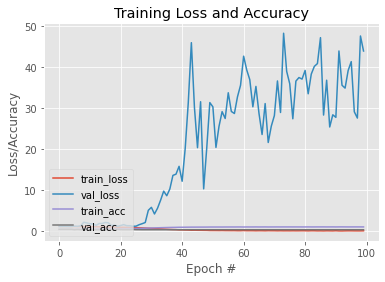

C:\Users\wesle\anaconda3\envs\py3_6_tensorflow2_1\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'without_mask': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 2608},
 'mask_weared_incorrect': {'precision': 0.3001226241569589,
  'recall': 1.0,
  'f1-score': 0.46168356519688747,
  'support': 1958},
 'with_mask': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 1958},
 'accuracy': 0.3001226241569589,
 'macro avg': {'precision': 0.1000408747189863,
  'recall': 0.3333333333333333,
  'f1-score': 0.1538945217322958,
  'support': 6524},
 'weighted avg': {'precision': 0.09007358953085921,
  'recall': 0.3001226241569589,
  'f1-score': 0.1385616831170303,
  'support': 6524}}

In [27]:
Avaliando_modelo(model_based_MobileNetV2, H_MobileNetV2, testX, testY)

In [ ]:
Avaliando_modelo(model_based_MobileNetV2_224, H_MobileNetV2_224, testX2,  testY2)

In [ ]:
Avaliando_modelo(model_based_ResNet152V2, H_ResNet152V2, testX,  testY)

In [ ]:
Avaliando_modelo(model_based_ResNet50V2, H_ResNet50V2, testX, testY)

In [ ]:
Avaliando_modelo(model_based_xception, H_xception, testX, testY)

## testar os modelos para uma foto única 

In [ ]:
current_path = os.getcwd()
image = dataset[0]#cv2.imread(current_path+"\\imagem_nova13.png")
# image = imutils.resize(image, width=800, height=600 )
print(type(image))
print(image.shape)

In [ ]:
#img_test = baseModel_xception.predict(image)#image.array_to_img(baseModel_xception.predict(testX))
from PIL import Image
plt.imshow(Image.fromarray(dataset[8], 'RGB'))
plt.show()

## salvar os pesos dos modelos para não precisar salvar de novo

In [ ]:
model_path = os.path.join("D:\\","FIA","TCC","Meus_Modelos","")
print(model_path)

In [ ]:
# https://www.tensorflow.org/tutorials/keras/save_and_load
# Save the weights
model_based_MobileNetV2.save_weights(model_path+'model_based_MobileNetV2_checkpoint')
model_based_ResNet152V2.save_weights(model_path+'model_based_ResNet152V2_checkpoint')
model_based_ResNet50V2.save_weights(model_path+'model_based_ResNet50V2_checkpoint')
model_based_xception.save_weights(model_path+'model_based_xception_checkpoint')

# # Create a new model instance
# model = create_model()# depois do model.compile(...) antes do fit

# # Restore the weights
# model.load_weights('./checkpoints/my_checkpoint')

### tentar deixar mais rapido com TFRecords
https://medium.com/mostly-ai/tensorflow-records-what-they-are-and-how-to-use-them-c46bc4bbb564